In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import random
import math

In [29]:
df = pd.read_csv('malicious_phish.csv')

print(df.shape)
df

(651191, 2)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [30]:
df.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


In [31]:
df.isnull().sum()

url     0
type    0
dtype: int64

In [32]:
df.type.value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

Text(0, 0.5, 'count')

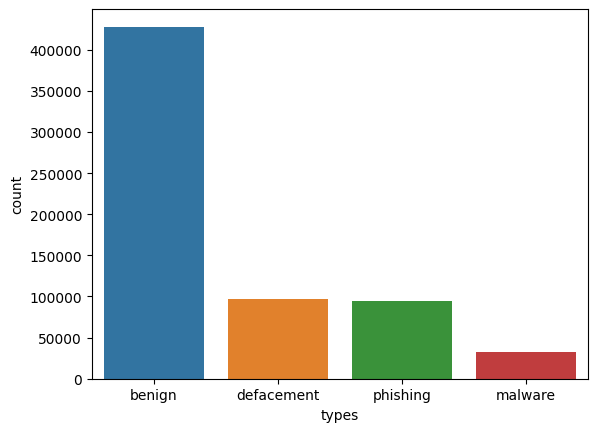

In [33]:
sns.barplot(x=df.type.value_counts().index, y=df.type.value_counts())
plt.xlabel('types')
plt.ylabel('count')

In [34]:
def is_url_ip_address(url: str) -> bool:
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0
    
df['is_ip'] = df['url'].apply(lambda i: is_url_ip_address(i))

In [35]:
df

,url,type,is_ip
0,br-icloud.com.br,phishing,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0
...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0


In [36]:
df.is_ip.value_counts()

0    638703
1     12488
Name: is_ip, dtype: int64

In [37]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    df[a] = df['url'].apply(lambda i: i.count(a))

In [38]:
df.describe()

,is_ip,@,?,-,=,.,#,%,+,$,!,*,",",//
count,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000
mean,0.019177,0.002219,0.223782,1.550421,0.603863,2.195453,0.000871,0.519502,0.068432,0.000238,0.000954,0.000395,0.004823,0.292453
std,0.137147,0.054183,0.441220,2.973790,1.516960,1.490732,0.032327,4.462254,0.621276,0.023544,0.039546,0.074938,0.152428,0.461838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,10.000000,20.000000,87.000000,51.000000,42.000000,6.000000,231.000000,37.000000,6.000000,5.000000,54.000000,15.000000,9.000000


In [39]:
df

,url,type,is_ip,@,?,-,=,.,#,%,+,$,!,*,",",//
0,br-icloud.com.br,phishing,0,0,0,1,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,0,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,0,0,2,0,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,0,1,1,4,3,0,0,0,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,0,1,1,3,2,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,0,0,0,0,3,0,0,0,0,0,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,0,0,2,0,2,0,0,0,0,0,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,0,0,0,0,2,0,0,0,0,0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,0,0,0,0,2,0,0,0,0,0,0,0,0
